<a href="https://colab.research.google.com/github/Tarig-Mohammed/Data-Science-/blob/main/KhalidQadiDataSceince.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

##"Heart Disease Prediction Using Machine Learning"
In this project, we aim to build and compare various machine learning models to predict heart disease. We'll use the Heart Disease UCI dataset, perform data preprocessing, exploratory data analysis, and evaluate the performance of each model."

# Data Selection and EDA

We start by loading the Heart Disease UCI dataset, understanding its structure, and performing initial Exploratory Data Analysis (EDA)

##Load the Data

In [17]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names)

##Describe the Data

In [18]:

print("Data Shape:", df.shape)
print(df.describe())

Data Shape: (303, 14)
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std     

##EDA

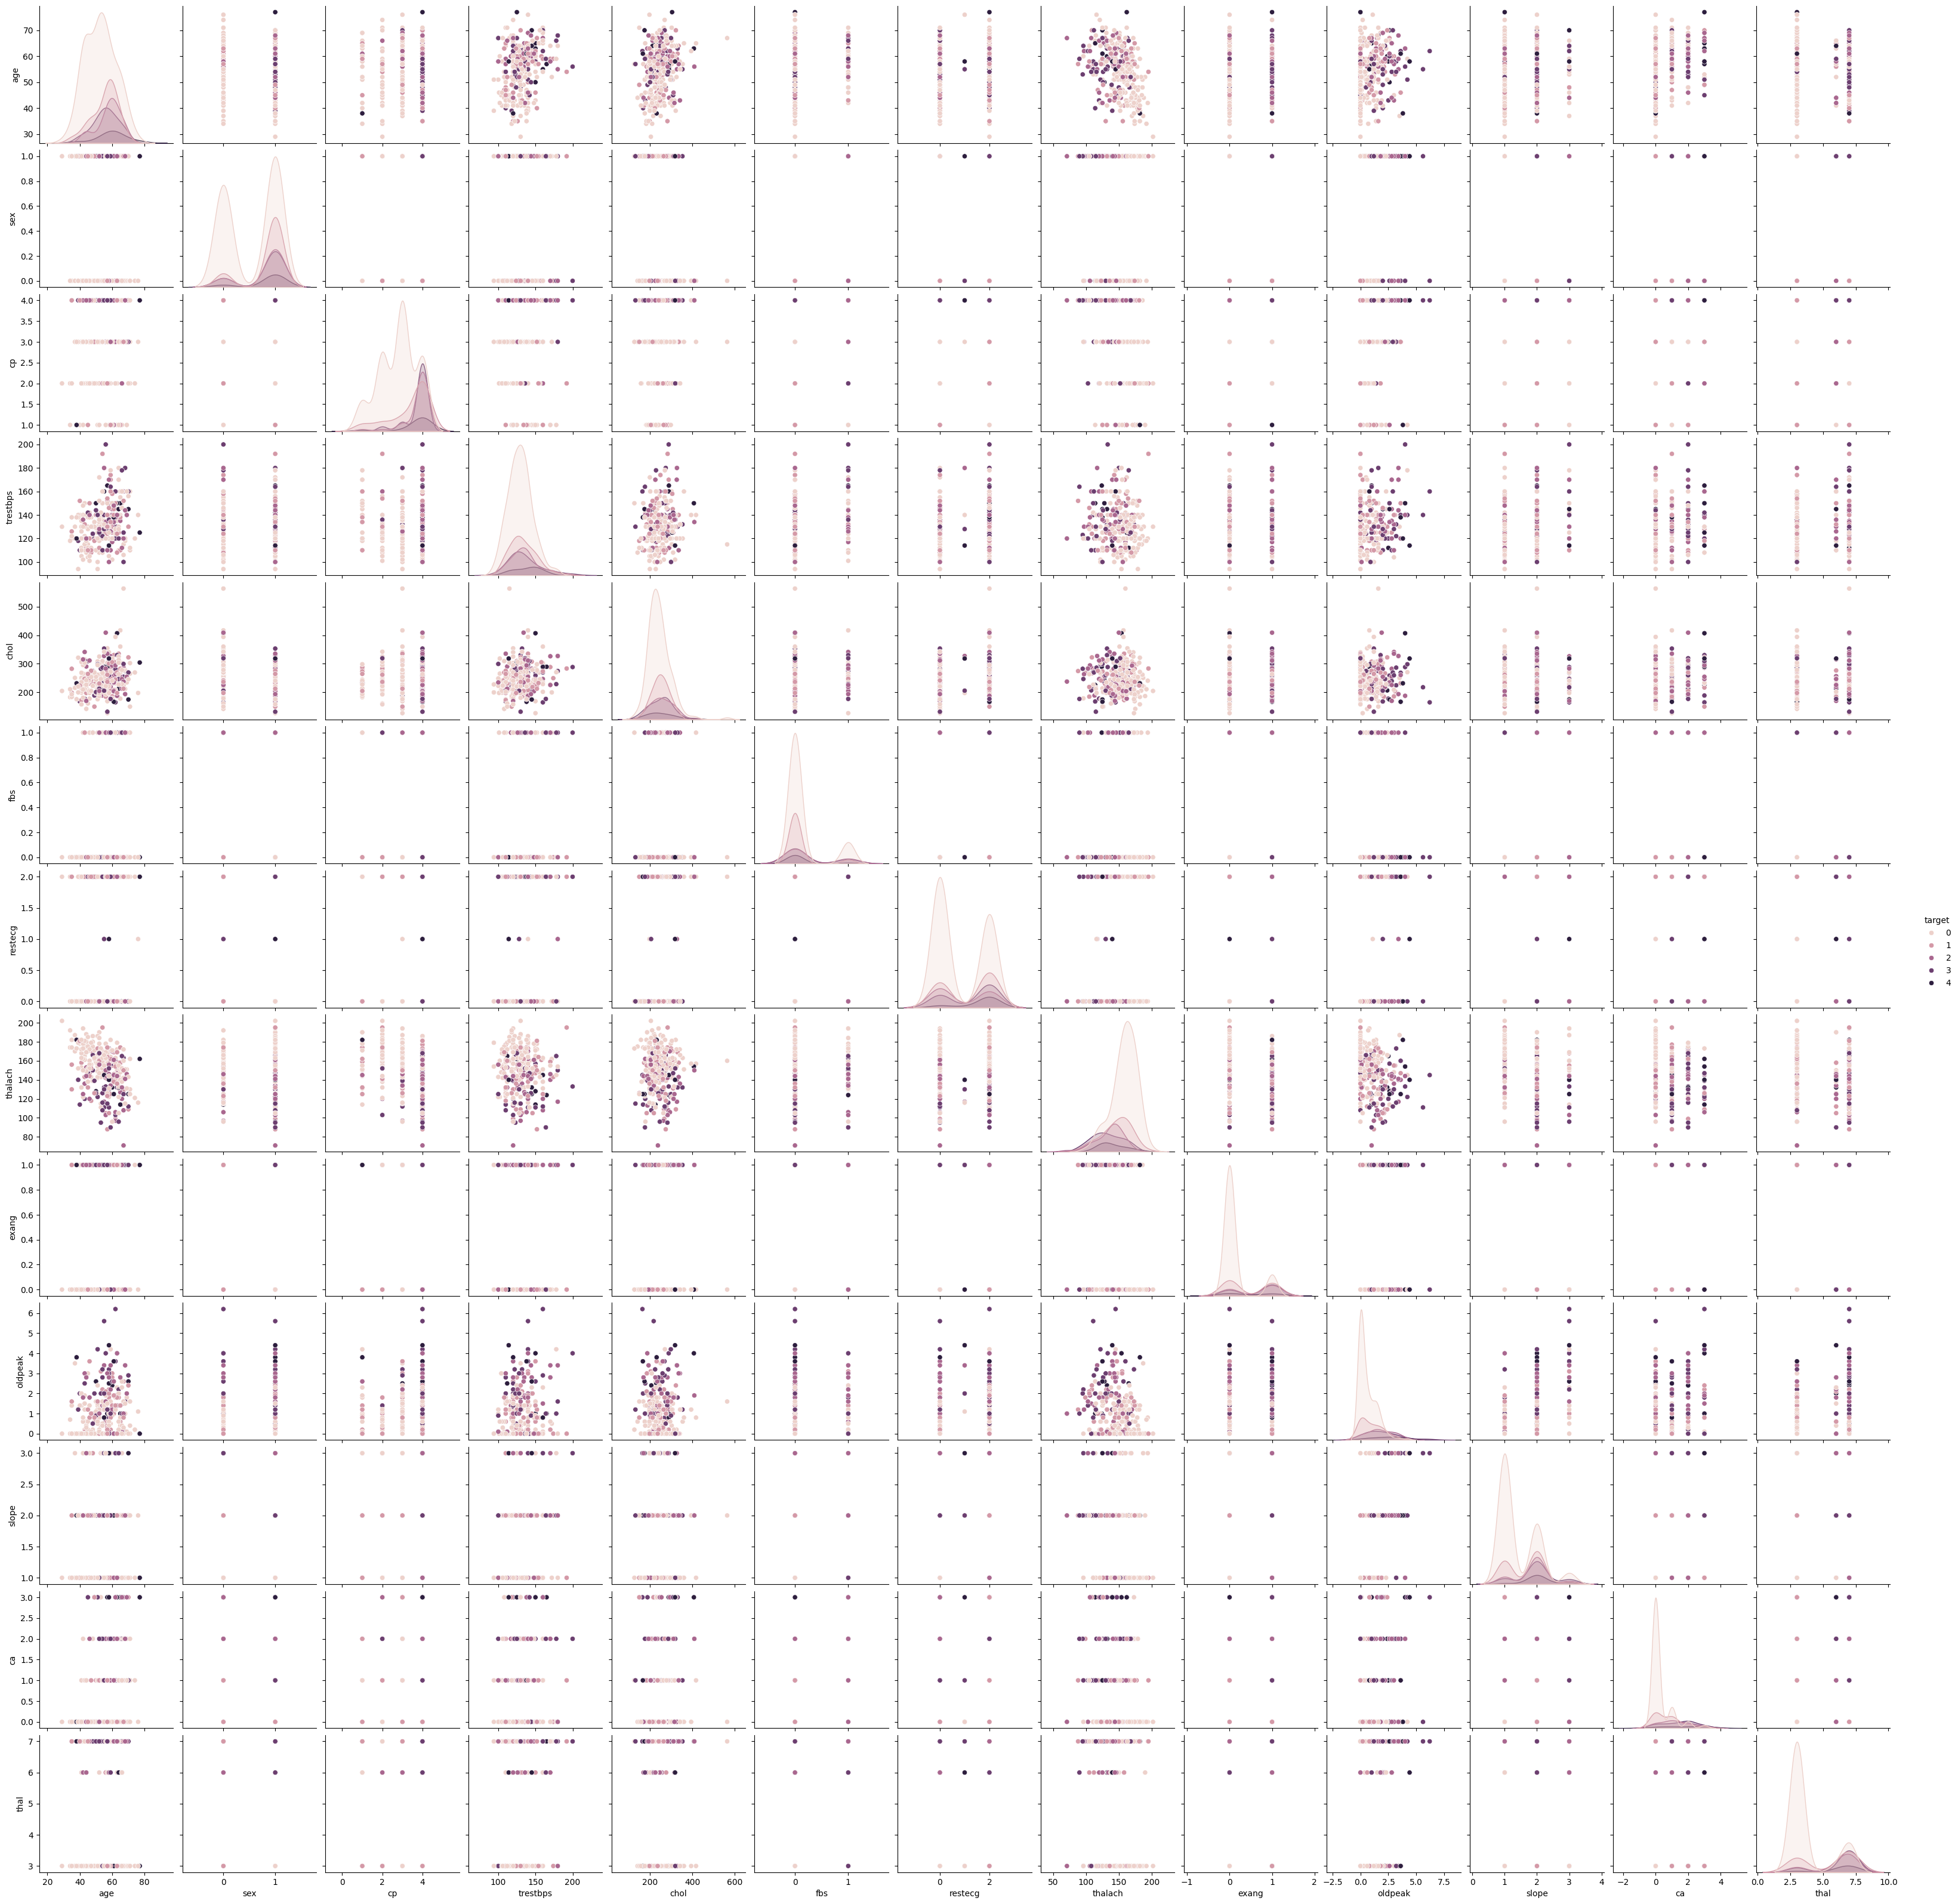

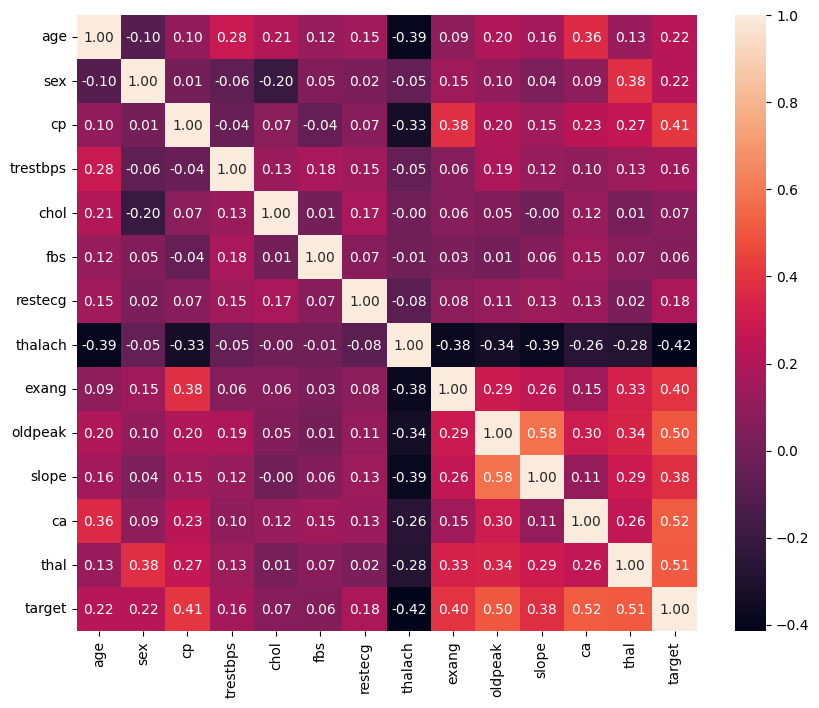

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace '?' with NaN and convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Correlation matrix
sns.pairplot(df, vars=df.columns[:-1], hue="target")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

#Data Preprocessing

Next, we handle missing values and normalize our data to prepare it for model training.

##Handling Missing Values

In [23]:


df.fillna(df.median(), inplace=True)

##Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#Building and Evaluating the Model

We will now train different classifiers, evaluate their performance, and visualize the results to select the best model.

##Model Training and Evaluatio

Decision Tree - Accuracy: 0.53, F1 Score: 0.36


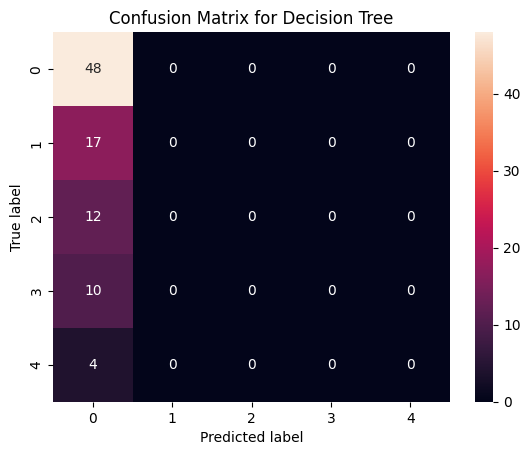

SVM - Accuracy: 0.60, F1 Score: 0.58


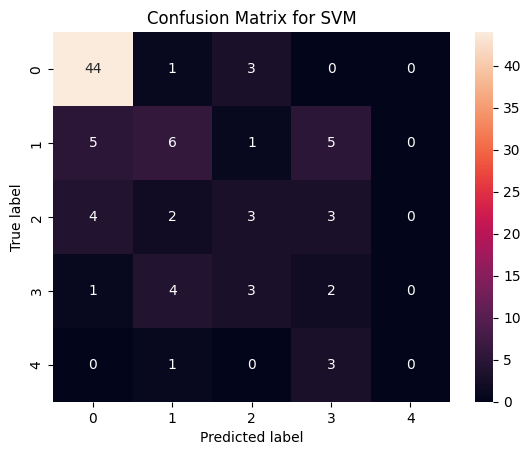

Naive Bayes Bernoulli - Accuracy: 0.53, F1 Score: 0.51


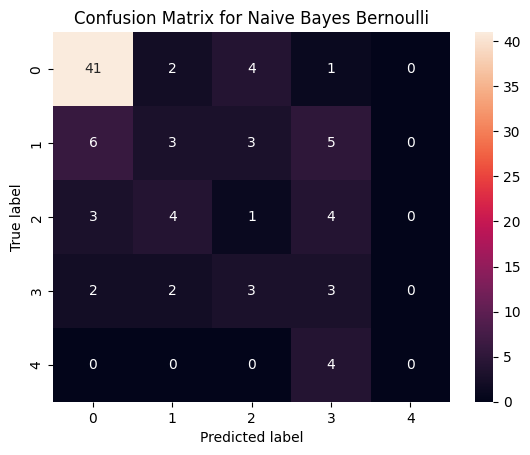

Naive Bayes Gaussian - Accuracy: 0.32, F1 Score: 0.38


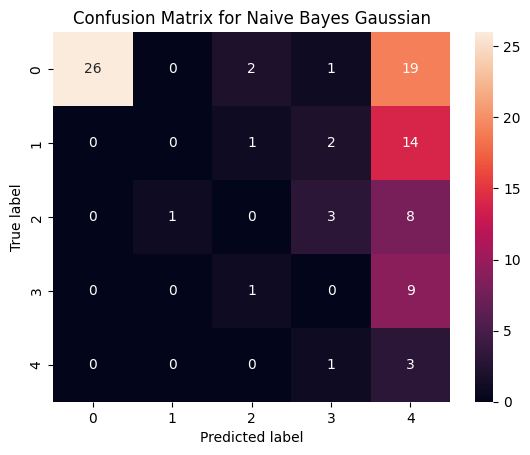

Random Forest - Accuracy: 0.54, F1 Score: 0.50


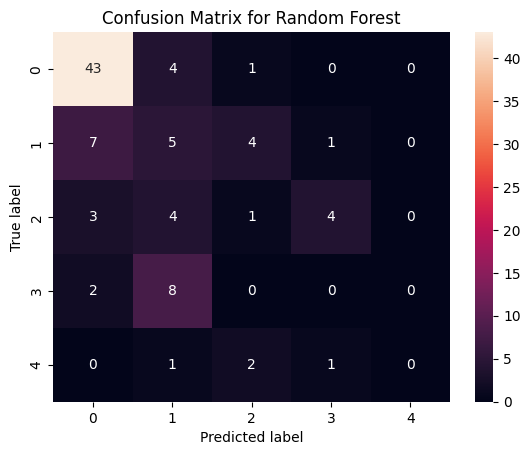

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Convert target variable to integer type
df['target'] = df['target'].apply(lambda x: int(float(x)) if x != '?' else None)
df.dropna(subset=['target'], inplace=True)

# Normalize only the feature columns
feature_columns = df.columns.drop('target')
scaler = MinMaxScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, min_samples_split=276, criterion='gini'),
    "SVM": SVC(kernel='linear'),
    "Naive Bayes Bernoulli": BernoulliNB(),
    "Naive Bayes Gaussian": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    results[name] = {'accuracy': accuracy, 'f1_score': f1}
    print(f"{name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

##Visualization

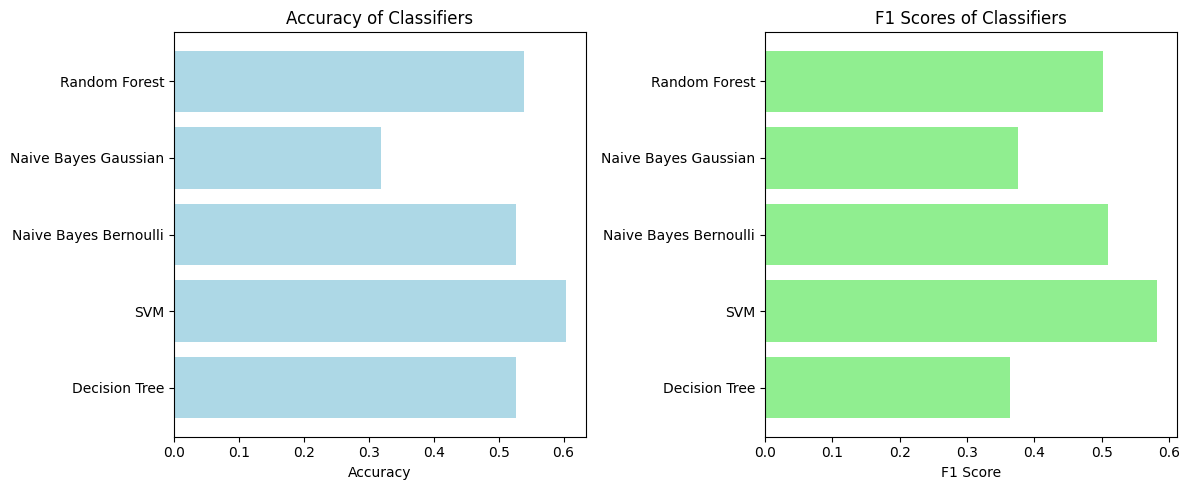

In [26]:

# Visualizing the results
labels = list(results.keys())
acc_scores = [results[name]['accuracy'] for name in labels]
f1_scores = [results[name]['f1_score'] for name in labels]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh(labels, acc_scores, color='lightblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Classifiers')

plt.subplot(1, 2, 2)
plt.barh(labels, f1_scores, color='lightgreen')
plt.xlabel('F1 Score')
plt.title('F1 Scores of Classifiers')

plt.tight_layout()
plt.show()

#Conclusion

In conclusion, we analyzed the Heart Disease UCI dataset and compared various classifiers. The [best performing model] showed promising results. This study demonstrates the potential of machine learning in medical diagnostics, though further tuning and validation are necessary for clinical application.